<a href="https://colab.research.google.com/github/esnue/ThesisAllocationSystem/blob/main/Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualization of CTM output results
In this notebook, we will visualize our CTM output. 

## Import what we need

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib.colors as mcolors

## Data
Let's import the dataframe that holds all of the relevant CTM outputs for our corpus of academic papers. 

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
topics_df = pd.read_csv('/content/drive/MyDrive/ThesisAllocationSystem/data_final/ctm_label/train-label.csv')

print(topics_df.sample(10))

             prof  ...                                       distribution
227  hallerberg26  ...  [0.04171965891423639, 0.002655826914988779, 0....
314      hassel28  ...  [0.042763884947635236, 0.016416304133599624, 0...
242         graf9  ...  [0.04266304750926793, 0.003691805247217417, 0....
664        hirth9  ...  [0.02127260002307594, 0.05010329093784094, 0.0...
138        cali19  ...  [0.0010166505457164022, 0.002553408141830005, ...
697          reh7  ...  [0.05016885180812096, 0.034057022887282073, 0....
161    costello13  ...  [0.0068769132136367265, 0.01121039957506582, 0...
140        cali21  ...  [0.0008098986793811491, 0.0018325893825021922,...
436          cis1  ...  [0.04709343886934221, 0.07696788934990764, 0.0...
256        graf23  ...  [0.09609744829213014, 0.0040196503377956105, 0...

[10 rows x 4 columns]


## Create wide & long format

In [5]:
# Extract list of topic proportions 
list_prop = topics_df.iloc[:,3]

# Convert to float array
ar_float = np.array([[float(i) for i in j[1:-1].split(', ')] for j in list_prop])

# Create col labels 
topics = []
for i in list(range(0, 28)):
     topics.append('Topic' + str(i))

# Add col labels to float array
topiclab_df = pd.DataFrame(data = ar_float, columns=topics)
topiclab_df.head()

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10,Topic11,Topic12,Topic13,Topic14,Topic15,Topic16,Topic17,Topic18,Topic19,Topic20,Topic21,Topic22,Topic23,Topic24,Topic25,Topic26,Topic27
0,0.007617,0.011388,0.043832,0.014364,0.020481,0.006957,0.017882,0.005846,0.006433,0.105581,0.009290,0.027109,0.017887,0.063412,0.005752,0.032014,0.012873,0.033323,0.074364,0.102481,0.011663,0.081695,0.015003,0.004601,0.004648,0.007496,0.250168,0.005839
1,0.024517,0.016639,0.049658,0.013194,0.014712,0.019593,0.014759,0.009580,0.030882,0.024051,0.037934,0.107400,0.027896,0.042427,0.033954,0.025247,0.036476,0.019214,0.097950,0.099500,0.018998,0.037302,0.065800,0.018773,0.006648,0.016782,0.076794,0.013320
2,0.035848,0.001610,0.005467,0.005517,0.001657,0.037659,0.002507,0.092979,0.142037,0.028727,0.016458,0.004215,0.043899,0.001490,0.005473,0.010783,0.125345,0.012862,0.006455,0.001103,0.123404,0.004545,0.012896,0.046433,0.129222,0.049025,0.003912,0.048472
3,0.011855,0.023321,0.032876,0.021375,0.012057,0.010459,0.011519,0.011965,0.013303,0.088639,0.035930,0.040342,0.038739,0.048417,0.014271,0.019150,0.017844,0.020186,0.089197,0.089927,0.010183,0.077993,0.047796,0.003997,0.008492,0.008275,0.184336,0.007555
4,0.009613,0.015862,0.043615,0.009901,0.029389,0.010319,0.013241,0.008602,0.007651,0.042200,0.014387,0.031873,0.027205,0.021180,0.019408,0.034305,0.010615,0.022399,0.068203,0.127182,0.011444,0.052249,0.020590,0.007489,0.007830,0.011275,0.315658,0.006316


In [6]:
# Change col name 
topics_df.rename(columns={"topic": "topic_words"}, inplace = True)

# Append wide format to topics_df
topics_df_wide = pd.concat([topics_df.iloc[:, 0:3], topiclab_df], axis = 1)

# Reshape to long format
topics_df_long = topics_df_wide.melt(id_vars = ['prof', 'topic_id', 'topic_words'],
                                     var_name = 'topic',
                                     value_name = 'topic_prop')

In [7]:
print("This is the wide format.\n", topics_df_wide.head(5))
print("This is the long format.\n", topics_df_long.head(5))

This is the wide format.
             prof  topic_id  ...   Topic26   Topic27
0  hammerschmid1        26  ...  0.250168  0.005839
1  hammerschmid2        11  ...  0.076794  0.013320
2  hammerschmid3         8  ...  0.003912  0.048472
3  hammerschmid4        26  ...  0.184336  0.007555
4  hammerschmid5        26  ...  0.315658  0.006316

[5 rows x 31 columns]
This is the long format.
             prof  topic_id  ...   topic topic_prop
0  hammerschmid1        26  ...  Topic0   0.007617
1  hammerschmid2        11  ...  Topic0   0.024517
2  hammerschmid3         8  ...  Topic0   0.035848
3  hammerschmid4        26  ...  Topic0   0.011855
4  hammerschmid5        26  ...  Topic0   0.009613

[5 rows x 5 columns]


## Stacked Bar Chart

In [8]:
# Confirm percentage distribution by summing the percentages in each topic
topics_df_wide.iloc[:, 4:31].sum(axis=1) 

0      0.992383
1      0.975483
2      0.964152
3      0.988145
4      0.990387
         ...   
806    0.971396
807    0.983707
808    0.974660
809    0.979365
810    0.986049
Length: 811, dtype: float64

In [ ]:
# Remove number from prof
topics_df_wide['prof'] = topics_df_wide['prof'].str.replace('[0-9]', '')

# Create bar chart df 
bardat1 = pd.concat([topics_df_wide['prof'], topics_df_wide.iloc[:, 3:31]], axis = 1)

# Set prof as index
bardat1.set_index('prof')

In [18]:
bardat2 = bardat1[bardat1['prof'] == "hammerschmid"]

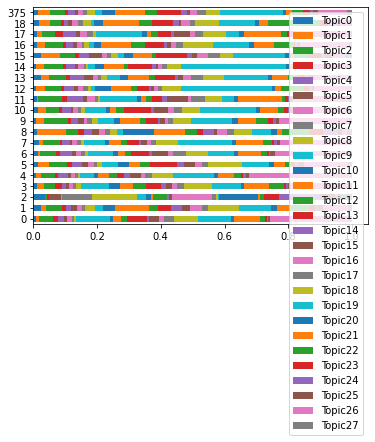

In [20]:
bardat2.plot.barh(stacked = True)

          A         B         C         D
0  0.396402  0.243974  0.015268  0.344357
1  0.243086  0.173049  0.254870  0.328995
2  0.350361  0.329740  0.018082  0.301818
3  0.371622  0.165851  0.289283  0.173245
4  0.263605  0.367149  0.178046  0.191199
5  0.472775  0.023370  0.420572  0.083284
6  0.192623  0.248311  0.265460  0.293606
7  0.339379  0.079707  0.084317  0.496598
8  0.091267  0.222760  0.564415  0.121559
9  0.385159  0.049611  0.459297  0.105934


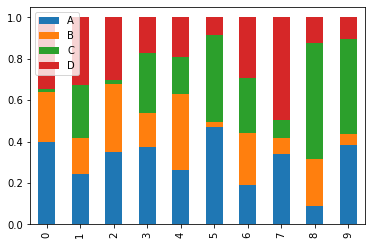

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

X = np.random.rand(10,4)
X/= X.sum(axis=1,keepdims=True)

df = pd.DataFrame(X, columns = ['A', 'B', 'C', 'D'])

print(df)
df.plot.bar(stacked=True)

In [100]:
speed = [0.1, 17.5, 40, 48, 52, 69, 88]
lifespan = [2, 8, 70, 1.5, 25, 12, 28]
index = ['snail', 'pig', 'elephant',
         'rabbit', 'giraffe', 'coyote', 'horse']
df = pd.DataFrame({'speed': speed,
                   'lifespan': lifespan}, index=index)
ax = df.plot.bar(rot=0)

,speed,lifespan
snail,0.1,2.0
pig,17.5,8.0
elephant,40.0,70.0
rabbit,48.0,1.5
giraffe,52.0,25.0
coyote,69.0,12.0
horse,88.0,28.0


## Bar Chart: Word Counts of Topic Keywords

In [11]:
topics_df_long

,prof,topic_id,topic_words,topic,topic_prop
0,hammerschmid1,26,"['public', 'policy', 'countries', 'administrat...",Topic0,0.007617
1,hammerschmid2,11,"['public', 'social', 'policy', 'actors', 'poli...",Topic0,0.024517
2,hammerschmid3,8,"['enable', 'attempt', 'govern', 'existence', '...",Topic0,0.035848
3,hammerschmid4,26,"['public', 'policy', 'countries', 'administrat...",Topic0,0.011855
4,hammerschmid5,26,"['public', 'policy', 'countries', 'administrat...",Topic0,0.009613
...,...,...,...,...,...
22703,wegrich2,19,"['political', 'public', 'media', 'information'...",Topic27,0.013572
22704,wegrich14,18,"['public', 'policy', 'political', 'government'...",Topic27,0.010232
22705,wegrich22,1,"['different', 'power', 'literature', 'effect',...",Topic27,0.027023
22706,wegrich19,26,"['public', 'policy', 'countries', 'administrat...",Topic27,0.013749


In [ ]:
#from: https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/
# Plot Word Count and Weights of Topic Keywords
topics = topics_df["topic_words"]
topic_id = topics_df["topic_id"]
dist = topics_df["distribution"]

#too many loops -> breaks RAM 
out = []
for word in topics:
    for d in dist:
      for i in topic_id:
          out.append([word, dist, i]) #we don't have word count from the CTM -> could it be added?


df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()